# Minimos cuadraticos (Least squares)

Dado una familia de modelos de regresión, la solución de mínimos cuadrados es el modelo que minimiza el error cuadrático medio en nuestro conjunto de datos de entrenamiento. Considera el siguiente **modelo lineal múltiple**:


$\begin{equation}
f(x) = w_0 + w_1 x_1 + ... + w_K x_K
\end{equation}$

Donde $x_1, ..., x_K$ son los preductores y $w_0, ..., w_K$ son los parámetros del modelo. Si contamos con un conjunto de datos de $N$ muestras, podemos determinar los parámetros de la solución de mínimos cuadrados mediante las **ecuaciones normales**

$\begin{equation}
\mathbf{w} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}
\end{equation}$

Donde $\mathbf{w}=[w_1, ... , w_K]^T$ son los parametros del modelo, $\mathbf{y}=[y_0, ..., y_N]^T$ son las etiquetas verdaderas del dataset y $\mathbf{X}$ es la matriz de diseño. La solución de mínimos cuadrados para **regresión polinómica simple** puede obtenerse siguiendo un enfoque idéntico. Dado un modelo polinómico:

$\begin{equation}
f(x) = w_0 + w_1 x + ... + w_K x^K
\end{equation}$

Podemos tratar $x, x^2, ..., x^K$ como predictores separados, costruir la correspondiente matriz de diseño $\mathbf{X}$ y usar la ecuación normal.

Como puedes ver en las ecuaciones normales, obtener la solución de mínimos cuadrados implica:

- **Arrays** ($\mathbf{w}$, $\mathbf{y}$ and $\mathbf{X}$).
- **Transposición**.
- **Inversión de matrices**.
- **Multiplicación de matrices**.

Exploremos un problema simple de regresión. Primero, definiremos y graficaremos nuestro conjunto de datos de entrenamiento, que consta de 10 muestras descritas por un predictor  `x` and y una etiqueta `y`.

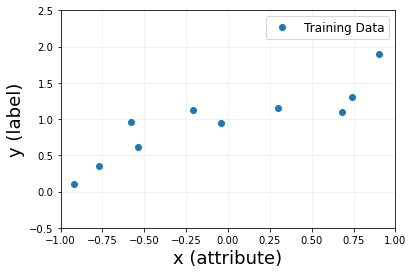

In [16]:
import numpy as np
np.set_printoptions(precision=3) # Hacemos esto para imprimir hasta 3 decimales
import matplotlib.pyplot as plt

# Definiendo un conjunto de datos ficticio
x = np.array([0.3000, -0.7700, 0.9000, -0.0400, 0.7400, -0.5800, -0.9200, -0.2100, -0.5400, 0.6800], ndmin=2).T
y = np.array([1.1492,  0.3582, 1.9013,  0.9487, 1.3096,  0.9646,  0.1079,  1.1262,  0.6131, 1.0951], ndmin=2).T

plt.plot(x, y, 'o', label="Training Data")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

Tenga en cuenta que aquí hemos obtenido la transposición de dos vectores fila usando .T en lugar de np.transpose. Ambas opciones son equivalentes. El punto más importante es que x e y son dos vectores columna compuestos por 10 filas y 1 columna, es decir, vectores de 10x1:

In [17]:
print(x.shape)
print(y.shape)

(10, 1)
(10, 1)


Obtengamos la solución de mínimos cuadrados para un modelo lineal simple $f(x) = w_0 + w_1 x$. Necesitamos calcular la matriz de diseño primero y luego usar la ecuación normal. Mostraremos los cálculos involucrados en las ecuaciones normales paso a paso:

Step 1:  $X^TX$

Step 2: $(X^TX)^{-1}$

Step 3: $(X^TX)^{-1}X^T$

In [18]:
X = np.column_stack([np.ones(x.shape), x])
print("La matrix diseño es:\n", X)

XTX = np.dot(X.T, X) # Step 1
XTX_inv = np.linalg.inv(XTX) # Step 2
XTX_invXT = np.dot(XTX_inv, X.T) # Step 3

w = np.dot(XTX_invXT, y)
print("los 2 parámetros de la solución lineal de mínimos cuadrados son\n", w)

La matrix diseño es:
 [[ 1.    0.3 ]
 [ 1.   -0.77]
 [ 1.    0.9 ]
 [ 1.   -0.04]
 [ 1.    0.74]
 [ 1.   -0.58]
 [ 1.   -0.92]
 [ 1.   -0.21]
 [ 1.   -0.54]
 [ 1.    0.68]]
los 2 parámetros de la solución lineal de mínimos cuadrados son
 [[0.987]
 [0.662]]


Ahora que tenemos los parámetros $w_0$ y $w_1$ del modelo lineal, podemos usarlos para predecir las etiquetas de 100 predictores distribuidos uniformemente entre -1 y 1:

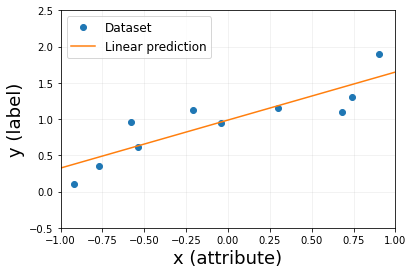

In [19]:
x_LS = np.linspace(-1,1,100).T
X_LS = np.column_stack([np.ones(x_LS.shape), x_LS])
y_LS = np.dot(X_LS, w)


plt.plot(x, y, 'o', label="Dataset")
plt.plot(x_LS, y_LS, label="Linear prediction")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

Hagamos lo mismo para un modelo cuadrático. Observa que nuestra matriz de diseño incluirá una nueva columna con los cuadrados de los predictores y, en lugar de 2, tendremos 3 parámetros ($w_0$, $w_1$ and $w_2$):


La matrix diseño es:
 [[ 1.     0.3    0.09 ]
 [ 1.    -0.77   0.593]
 [ 1.     0.9    0.81 ]
 [ 1.    -0.04   0.002]
 [ 1.     0.74   0.548]
 [ 1.    -0.58   0.336]
 [ 1.    -0.92   0.846]
 [ 1.    -0.21   0.044]
 [ 1.    -0.54   0.292]
 [ 1.     0.68   0.462]]

Los 3 parámetros de la solución cuadrática de mínimos cuadrados son
 [[ 1.066  0.665 -0.197]]


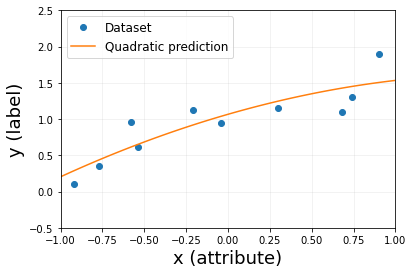

In [20]:
X = np.column_stack([np.ones(x.shape), x, x**2]) #Tenga en cuenta que estamos incluyendo potencias hasta 3, el cuadrado de los predictores.
print("La matrix diseño es:\n", X)

XTX = np.dot(X.T, X)                # Step 1
XTX_inv = np.linalg.inv(XTX)        # Step 2
XTX_invXT = np.dot(XTX_inv, X.T)    # Step 3

w = np.dot(XTX_invXT, y)
print("\nLos 3 parámetros de la solución cuadrática de mínimos cuadrados son\n", w.T)

X_LS = np.column_stack([np.ones(x_LS.shape), x_LS, x_LS**2])
y_LS = np.dot(X_LS, w)


plt.plot(x, y, 'o', label="Dataset")
plt.plot(x_LS, y_LS, label="Quadratic prediction")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

La solución de mínimos cuadrados para un modelo cúbico consta de cuatro parámetros y se obtendrá de manera idéntica:

La matriz de diseño es:
 [[ 1.000e+00  3.000e-01  9.000e-02  2.700e-02]
 [ 1.000e+00 -7.700e-01  5.929e-01 -4.565e-01]
 [ 1.000e+00  9.000e-01  8.100e-01  7.290e-01]
 [ 1.000e+00 -4.000e-02  1.600e-03 -6.400e-05]
 [ 1.000e+00  7.400e-01  5.476e-01  4.052e-01]
 [ 1.000e+00 -5.800e-01  3.364e-01 -1.951e-01]
 [ 1.000e+00 -9.200e-01  8.464e-01 -7.787e-01]
 [ 1.000e+00 -2.100e-01  4.410e-02 -9.261e-03]
 [ 1.000e+00 -5.400e-01  2.916e-01 -1.575e-01]
 [ 1.000e+00  6.800e-01  4.624e-01  3.144e-01]]

Los 4 parametros de la solución cubica  de minimos cuadraticos son
 [[ 1.004]
 [-0.145]
 [-0.091]
 [ 1.326]]


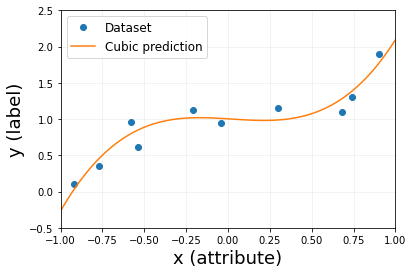

In [21]:
X = np.column_stack([np.ones(x.shape), x, x**2, x**3])
print("La matriz de diseño es:\n", X)

XTX = np.dot(X.T, X)
XTX_inv = np.linalg.inv(XTX)
XTX_invXT = np.dot(XTX_inv, X.T)

w = np.dot(XTX_invXT, y)
print("\nLos 4 parametros de la solución cubica  de minimos cuadraticos son\n", w)

X_LS = np.column_stack([np.ones(x_LS.shape), x_LS, x_LS**2, x_LS**3])
y_LS = np.dot(X_LS, w)


plt.plot(x, y, 'o', label="Dataset")
plt.plot(x_LS, y_LS, label="Cubic prediction")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

Finalmente, obtengamos la solución de mínimos cuadrados de un polinomio de grado 4. Pero, pongamos los pasos 1 al 3 en una sola línea de código

La matriz de diseño es:
 [[ 1.000e+00  3.000e-01  9.000e-02  2.700e-02  8.100e-03]
 [ 1.000e+00 -7.700e-01  5.929e-01 -4.565e-01  3.515e-01]
 [ 1.000e+00  9.000e-01  8.100e-01  7.290e-01  6.561e-01]
 [ 1.000e+00 -4.000e-02  1.600e-03 -6.400e-05  2.560e-06]
 [ 1.000e+00  7.400e-01  5.476e-01  4.052e-01  2.999e-01]
 [ 1.000e+00 -5.800e-01  3.364e-01 -1.951e-01  1.132e-01]
 [ 1.000e+00 -9.200e-01  8.464e-01 -7.787e-01  7.164e-01]
 [ 1.000e+00 -2.100e-01  4.410e-02 -9.261e-03  1.945e-03]
 [ 1.000e+00 -5.400e-01  2.916e-01 -1.575e-01  8.503e-02]
 [ 1.000e+00  6.800e-01  4.624e-01  3.144e-01  2.138e-01]]

Los 5 parametros de la solución de minimos cuadraticos de grado 4 son
 [[ 1.091]
 [-0.2  ]
 [-0.932]
 [ 1.425]
 [ 1.02 ]]


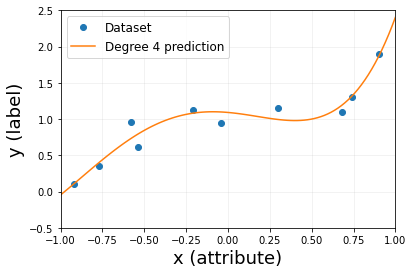

In [22]:

X = np.column_stack([np.ones(x.shape), x, x**2, x**3, x**4]) # Note we are including powers up to 4!
print("La matriz de diseño es:\n", X)

w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)
print("\nLos 5 parametros de la solución de minimos cuadraticos de grado 4 son\n", w)

X_LS = np.column_stack([np.ones(x_LS.shape), x_LS, x_LS**2, x_LS**3, x_LS**4])
y_LS = np.dot(X_LS, w)


plt.plot(x, y, 'o', label="Dataset")
plt.plot(x_LS, y_LS, label="Degree 4 prediction")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

# Summary

En esta primera parte, hemos recordado varias operaciones:

- **Transposition**: Dada una matriz `X`, su transposición es  `np.transpose(X)` y tambien `X.T`.
- **Column stacking**: Dado varios vectores con la misma forma (shape), por ejemplo `x1`, `x2` y `x3`, estos se puedne apilar (stacked) juntos usando `np.column_stack([x1, x2, x3])`.
- **Multiplicación de matrices**: Dada dos matrices `X` y `Y` (con las dimensiones correctas!), podemo hacer la multiplicación con `np.dot(X,Y)`.
- **Inversión de matrices**: The inversa de un matriz `X` se puede obtener con `np.linalg.inv(X)`.

Con estas operaciones básicas podemos:

+ Obtener la etiqueta predicha de un conjunto de datos compuesto por cualquier número de muestras.
+ Obtener la solución de mínimos cuadrados para modelos lineales y polinómicos.

En general, los arreglos de NumPy serán nuestra elección preferida para representar datos complejos en una cuadrícula (como series temporales e imágenes) y conjuntos de datos homogéneos, donde todos los atributos son del mismo tipo. Los dataframes de Pandas serán útiles para representar conjuntos de datos heterogéneos, donde diferentes atributos pueden tener diferentes tipos.

**Listo**, ahora  has solución de mínimos cuadrados de un polinomio de grado 5 y 9, igual que en los paso  anteriores

In [23]:
X = np.column_stack([np.ones(x.shape), x, x**2, x**3, x**4, x**5])
print("La matriz de diseño es:\n", X)

# Complementa

La matriz de diseño es:
 [[ 1.000e+00  3.000e-01  9.000e-02  2.700e-02  8.100e-03  2.430e-03]
 [ 1.000e+00 -7.700e-01  5.929e-01 -4.565e-01  3.515e-01 -2.707e-01]
 [ 1.000e+00  9.000e-01  8.100e-01  7.290e-01  6.561e-01  5.905e-01]
 [ 1.000e+00 -4.000e-02  1.600e-03 -6.400e-05  2.560e-06 -1.024e-07]
 [ 1.000e+00  7.400e-01  5.476e-01  4.052e-01  2.999e-01  2.219e-01]
 [ 1.000e+00 -5.800e-01  3.364e-01 -1.951e-01  1.132e-01 -6.564e-02]
 [ 1.000e+00 -9.200e-01  8.464e-01 -7.787e-01  7.164e-01 -6.591e-01]
 [ 1.000e+00 -2.100e-01  4.410e-02 -9.261e-03  1.945e-03 -4.084e-04]
 [ 1.000e+00 -5.400e-01  2.916e-01 -1.575e-01  8.503e-02 -4.592e-02]
 [ 1.000e+00  6.800e-01  4.624e-01  3.144e-01  2.138e-01  1.454e-01]]


De los seis modelos, ¿cuál se destaca como el mejor?,  al considerar:

1. La Superficie de Error Empírico
2. La Verdadera Superficie de Error

# Explorando el sobreajuste (overfitting), validación y regularización en regresión

Nuestro objetivo principal es crear modelos que funcionen bien **durante su despliegue**. A diferencia de otros enfoques de ingeniería y científicos, en el aprendizaje estadistico **carecemos de una descripción perfecta** de la población objetivo y todo lo que podemos hacer es tomar **muestras de datos** de la población. Usamos datos en diferentes **tareas**: para construir nuestros modelos (**train**), para evaluar su rendimiento durante el despliegue (**test**) y para seleccionar una familia adecuada de modelos para el entrenamiento (**validación**).

En el ejercicio anterior, obtuvimos la solución de mínimos cuadrados de cuatro familias de modelos polinómicos, es decir, polinomios de grado 1 (lineal), 2 (cuadrático), 3 (cúbico) y 4. Los mínimos cuadrados son un método exacto y proporcionan el **modelo óptimo** definido por la **superficie de error empírico**. Como sabes, el modelo óptimo definido por la superficie de error empírico es en general diferente del modelo óptimo definido por la verdadera superficie de error, que es el modelo que realmente estamos buscando. Esta distinción es importante, ya que nuestros modelos podrían funcionar muy bien durante el entrenamiento, pero muy mal durante su despliegue. En tales casos, hablamos de **sobreajuste**.

El sobreajuste ocurre en escenarios donde tenemos un **dataset pequeño** y **modelos complejos** y se puede detectar comparando el rendimiento del entrenamiento y el rendimiento durante el despliegue. El sobreajuste se puede evitar teniendo conjuntos de datos lo suficientemente grandes y controlando la complejidad de nuestros modelos. Podemos identificar la complejidad adecuada de nuestros modelos utilizando enfoques de **validación**. Los métodos de **regularización** también pueden usarse para controlar la flexibilidad de nuestros modelos.

En este laboratorio exploramos el sobreajuste, validación y regularización en un problema de regresión.

# Un problema de regresión simple

En este parte de laboratorio, exploraremos el mismo conjunto de datos simple que usamos en la parte 1. Este conjunto de datos consta de 10 muestras descritas por un predictor `x` y una etiqueta `y`. Definamos y tracemos el conjunto de datos.

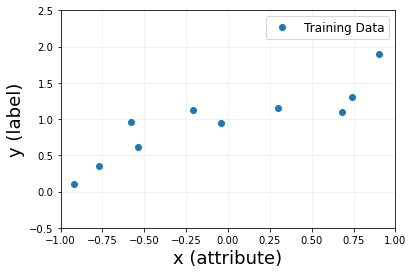

In [24]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

xTrain = np.array([0.3000, -0.7700, 0.9000, -0.0400, 0.7400, -0.5800, -0.9200, -0.2100, -0.5400, 0.6800])
yTrain = np.array([1.1492,  0.3582, 1.9013,  0.9487, 1.3096,  0.9646,  0.1079,  1.1262,  0.6131, 1.0951])

plt.plot(xTrain, yTrain, 'o', label="Training Data")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

Nuestro siguiente paso será obtener el **ajuste lineal por mínimos cuadrados* . En esta práctica de laboratorio, aprovecharemos la implementación de mínimos cuadrados proporcionada por NumPy ( polyfit) en lugar de implementar los mínimos cuadrados nosotros mismos. Puedes encontrar más información al respecto polyfit [aquí](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html).

In [25]:
order = 1
w = np.polyfit(xTrain, yTrain, order)
print("Los coeficientes de la solución lineal de mínimos cuadrados son: ", w)

Los coeficientes de la solución lineal de mínimos cuadrados son:  [0.662 0.987]


Estos coeficientes deberían ser los mismos que obtuvimos en la primera parte con nuestra propia implementación de mínimos cuadrados.

NumPy también ofrece `poli1d`, una clase de la biblioteca que encapsula operaciones relacionadas con polinomios. Usar `poli1d` es muy sencillo y se describe [aquí](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html). Creemos *NumPy polynomial object* definido por los coeficientes devueltos por polyfit e imprimámoslo

In [26]:
p = np.poly1d(w)
print("La expresión matemática del modelo lineal ajustado es: ", p)
print("Los coeficientes del modelo son: ", p.c)

La expresión matemática del modelo lineal ajustado es:   
0.6621 x + 0.9865
Los coeficientes del modelo son:  [0.662 0.987]


Una vez que se ha creado la solución lineal `p`, es fácil hacer una predicción. Solo necesitamos pasar el predictor `x` al polinomio de la siguiente manera:

In [27]:
x = 0
yPred = p(x)
print("Dado un predictor x = ", x, "la etiqueta predicha es  y = ", yPred)

Dado un predictor x =  0 la etiqueta predicha es  y =  0.9865231644203777


Puedes probar varios valores de $x$ y obtener la etiqueta predicha.

Vamos a graficar el modelo lineal de mínimos cuadrados junto con el conjunto de datos de entrenamiento

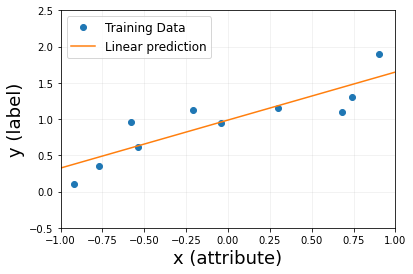

In [28]:
x_LS = np.linspace(-1,1,100).T
y_LS = p(x_LS)

plt.plot(xTrain, yTrain, 'o', label="Training Data")
plt.plot(x_LS, y_LS, label="Linear prediction")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

# ¿Cuál es la calidad de este modelo lineal?
Los mínimos cuadrados utilizan el error cuadrático medio (MSE, por sus siglas en inglés) como métrica de calidad. Recuerda que el MSE se define como

$E_{MSE} = \frac{1}{N}\sum_{i=1}^{N}{e_i^2}=\frac{1}{N}\sum_{i=1}^{N}{(y_i-\hat{y}_i)^2}$

Donde $N$ es el numero de muestras, $y_i$ es la etiqueta verdadera y $\hat{y}_i$ es la etiqueta predicha. Vamos a mostrar paso a paso cómo obtener el MSE de entrenamiento del modelo lineal ajustado:

In [29]:
yPredTrain = p(xTrain)
error = yTrain - yPredTrain
errorSq = error**2
MSETrain = np.sum(errorSq)/10

print("Los predictores son ", xTrain)

print("\nLas etiquetas verdaderas son ", yTrain)

print("\nLas etiquetas predichas son ", yPredTrain)

print("\nLos errores son ", error)

print("\nLos errores al cuadrado son ", errorSq)

print("\nEl  MSE de entrenamiento es  ", MSETrain)


Los predictores son  [ 0.3  -0.77  0.9  -0.04  0.74 -0.58 -0.92 -0.21 -0.54  0.68]

Las etiquetas verdaderas son  [1.149 0.358 1.901 0.949 1.31  0.965 0.108 1.126 0.613 1.095]

Las etiquetas predichas son  [1.185 0.477 1.582 0.96  1.476 0.602 0.377 0.847 0.629 1.437]

Los errores son  [-0.036 -0.118  0.319 -0.011 -0.167  0.362 -0.269  0.279 -0.016 -0.342]

Los errores al cuadrado son  [1.293e-03 1.404e-02 1.017e-01 1.286e-04 2.785e-02 1.311e-01 7.262e-02
 7.769e-02 2.522e-04 1.167e-01]

El  MSE de entrenamiento es   0.05434014916039903


Revisa el gráfico que muestra los datos de entrenamiento y el modelo lineal de mínimos cuadrados. Asegúrese de que los errores individuales que ha obtenido tengan sentido para usted antes de continuar. Por ejemplo, verifique aquellas muestras donde el error sea cercano a cero o identifique las muestras que tengan un valor negativo

# Complejidad y entrenamiento MSE

A medida que aumentamos el orden de un modelo polinomial, aumenta su **flexibilidad**. Los modelos flexibles pueden producir formas complejas y, por lo tanto, podrán reproducir patrones complejos. Debido a esto, los modelos flexibles siempre harán **mejores predicciones** durante el **entrenamiento**.
Hay un riesgo, como usted sabe. Nuestro conjunto de datos de entrenamiento es el resultado de un **patrón** (que queremos descubrir) y **detalles irrelevantes** (o ruido, que queremos ignorar). Durante la optimización, le pedimos a nuestros modelos que hagan las mejores predicciones que puedan; sin embargo, esta predicción incluye tanto patrones como detalles irrelevantes. Cuanto mayor sea la complejidad del modelo, mayor será el riesgo de aprender esos detalles irrelevantes, y esto dará como resultado un rendimiento de implementación más bajo.

En esta sección, ajustaremos varios modelos polinómicos de grados 1 (lineal) a 9 a nuestro conjunto de datos. Obtendremos también el MSE de entrenamiento de cada modelo y la suma de cuadrados de sus coeficientes (SSC), definidos como:

$SSC = \sum_{d=0}^{D}{w_d^2}$

dónde $D$ es el grado del polinomio y $w_d$ son los coeficientes.

In [30]:
from google.colab import widgets

orders = range(1,10)
tb = widgets.TabBar([str(order) for order in orders])

for order in orders:
  with tb.output_to(str(order), select= (order < 2)):

    p = np.poly1d(np.polyfit(xTrain, yTrain, int(order)))

    yPredTrain = p(xTrain)
    error = yTrain - yPredTrain
    errorSq = error**2
    MSE_Train = np.sum(errorSq)/10

    plt.plot(xTrain, yTrain, 'o', label='Train data')
    plt.plot(x_LS, p(x_LS), '-', alpha=0.8, label='Learned model', linewidth=2)
    plt.xlabel("x", fontsize=14)
    plt.ylabel("y",fontsize=14)
    plt.xlim(-1,1)
    plt.ylim(-0.5,2.5)
    plt.grid(alpha=0.2)
    plt.legend(loc='upper left', fontsize=12)
    plt.show()


    print('Los coeficientes del modelo ajustado son:\n {} \n\n---\n'.format(p.c))
    print('El modelo ajustado es:\n {} \n\n---\n'.format(p))
    print('El MSE de entrenamiento es: {:8.3f} \n\n---\n'.format(MSE_Train))
    print("El SSC es: {:8.3f}".format(sum(p.c**2)))

ModuleNotFoundError: No module named 'google.colab'

En este punto, vale la pena detenerse y analizar los resultados que ha obtenido. Específicamente, enfócate en:

* Los **coeficientes** de los modelos ajustados y su **expresión matemática.**
* La **forma** de los modelos ajustados. ¿Podría explicar por qué un polinomio de grado 9 es más flexible que un polinomio de grado 1? Visualmente, ¿cuál hace la mejor predicción en el conjunto de datos de entrenamiento?
* **El MSE de entrenamiento** . ¿Cómo cambia a medida que aumentamos el grado del modelo polinomial? De acuerdo con el valor de MSE de entrenamiento, ¿cuál hace la mejor predicción en el conjunto de datos de entrenamiento? ¿Es consistente con su interpretación visual?
* El valor **SSC** . ¿Cómo cambia a medida que aumentamos el grado del polinomio? Echa un vistazo a la expresión matemática de los modelos ajustados. ¿Puedes ver que el valor SSC nos dice qué tan grandes son los coeficientes?
Y ahora la pregunta final. ¿Sabrías decir qué modelo está sobreajustado ? Trata de justificar muy claramente por qué y discútelo con tus compañeros.


-- A medida que aumenta el orden del modelo, la expresión se vuelve más compleja.

-- Visualmente, modelos de mayor orden pueden ajustarse más de cerca a los puntos de entrenamiento, también pueden volverse más sensibles al ruido.

-- El MSE de entrenamiento disminuye cuando se aumenta el grado.

-- El valor SSC aumenta a medida que aumenta el grado del polinomio, indicando que los coeficientes son más grandes en modelos más complejos. Esto podría sugerir sobreajuste si el modelo se vuelve demasiado complejo para la cantidad de datos disponibles.

El modelo de orden 9 tiene un MSE de entrenamiento muy bajo, pero es probable que esté sobreajustado, ya que su SSC es significativamente mayor que el de modelos de órdenes inferiores. Puede no generalizar bien a nuevos datos.

# Overfitting y validación

Un modelo está sobreajustado cuando se desempeña muy bien en el conjunto de datos de entrenamiento, pero muestra un rendimiento de implementación deficiente. El polinomio de grado 9 funciona muy bien en nuestro conjunto de datos de entrenamiento. Esto puede parecerle sospechoso, pero hasta que evalúemos el rendimiento de implementación de un modelo, no podemos decir que el modelo se está sobreajustando.

El error de entrenamiento se usa para ajustar un modelo, pero nunca para evaluar su rendimiento de implementación. **Test tasks** incluyen un conjunto de datos separado (test dataset) para evaluar el rendimiento de un modelo final. **Validation tasks**  se utilizan para seleccionar una familia adecuada de modelos para entrenar e involucran varias rondas en las que entrenamos una familia de modelos con un conjunto de datos y evaluamos su desempeño de implementación con otro conjunto de datos.

En esta sección, implementaremos una tarea de validación simple para identificar el grado correcto para nuestro polinomio. Específicamente, implementaremos un enfoque **validation set**. Después de seleccionar el mejor modelo polinomial, lo volveremos a entrenar con todos los datos disponibles para producir nuestro modelo final.

Supongamos que los datos utilizados para el entrenamiento son los mismos que usamos antes y que el conjunto de datos de validación es el siguiente:

In [ ]:
xVal = np.array([0.1100, 0.2300, 0.1800, 0.3500, 0.5200, -0.4400, -0.6900, -0.2400, 0.4300, -0.4100, 0.3300, 0.8800, -0.4300, 0.5600, 0.6600, -0.0100, -0.8300, 0.5700, 0.3400, 0.6700])
yVal = np.array([1.0569, 1.0647, 0.9575, 1.2097, 0.8371, 0.8573, 0.6128, 1.1087, 0.9253, 0.9788, 1.0590, 1.6263, 0.7660, 1.0799, 1.3341, 0.6867, 0.3657, 1.1747, 1.0440, 1.1315])


Vamos a graficar ambos conjuntos de datos en el mismo gráfico:


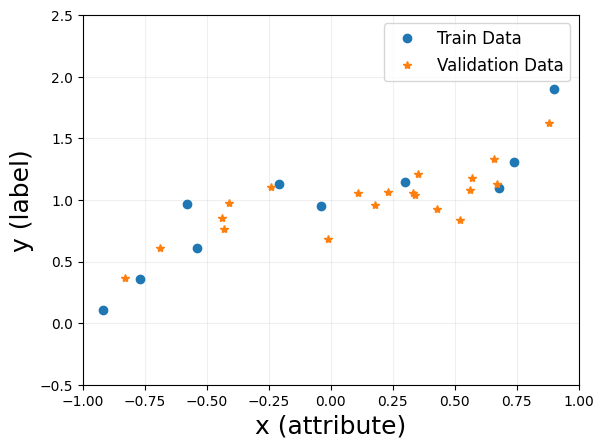

In [ ]:
plt.plot(xTrain, yTrain, 'o', label="Train Data")
plt.plot(xVal, yVal, '*', label="Validation Data")
plt.xlabel("x (attribute)", fontsize=18)
plt.ylabel("y (label)", fontsize=18)
plt.xlim(-1,1)
plt.ylim(-0.5,2.5)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

Visualmente, está claro que nuestros datos siguen un patrón cúbico. Recuerde que este es un conjunto de datos simple que estamos usando para ilustrar conceptos clave. En general, no podremos determinar tan fácilmente la complejidad del patrón subyacente.

Supongamos entonces que no sabemos cuál debería ser la complejidad correcta de nuestro modelo y usemos un enfoque de conjunto de validación para seleccionar la complejidad (es decir, el grado) del modelo polinomial final.

En la siguiente celda, **ajusta nuevamente modelos polinomiales de grados 1 a 9 y calcula  el error de entrenamiento y validación**. También **traza en el mismo gráfico el conjunto de datos de entrenamiento, el conjunto de datos de validación y cada modelo polinomial ajustado**.

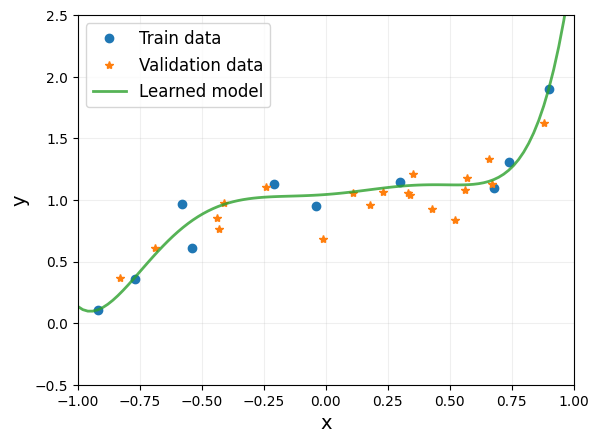

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

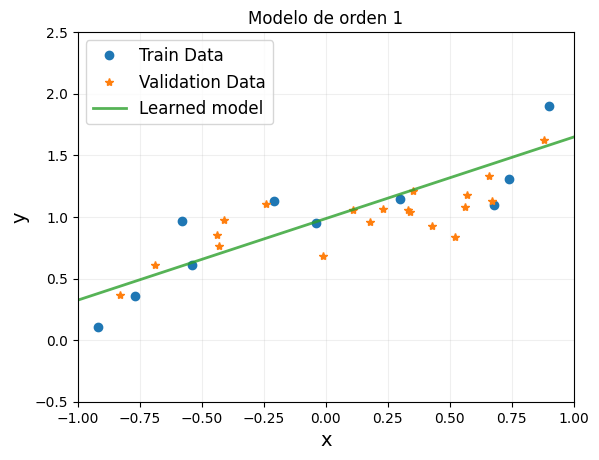

Los coeficientes del modelo ajustado son:
 [0.662 0.987] 

---

El modelo ajustado es:
  
0.6621 x + 0.9865 

---

El MSE de entrenamiento es:    0.054 

---

El MSE de validación es:    0.093 

---



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

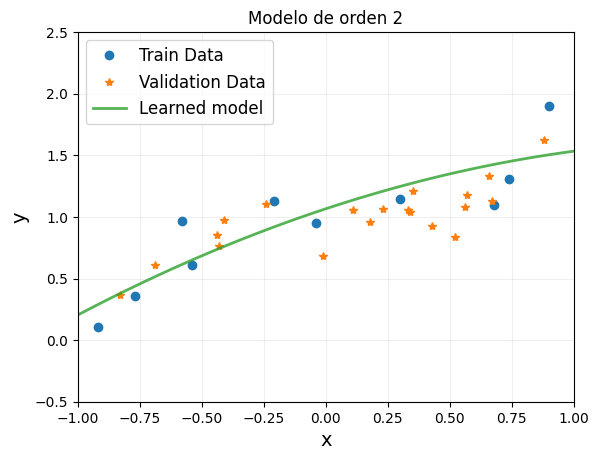

Los coeficientes del modelo ajustado son:
 [-0.197  0.665  1.066] 

---

El modelo ajustado es:
          2
-0.1974 x + 0.6649 x + 1.066 

---

El MSE de entrenamiento es:    0.051 

---

El MSE de validación es:    0.109 

---



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

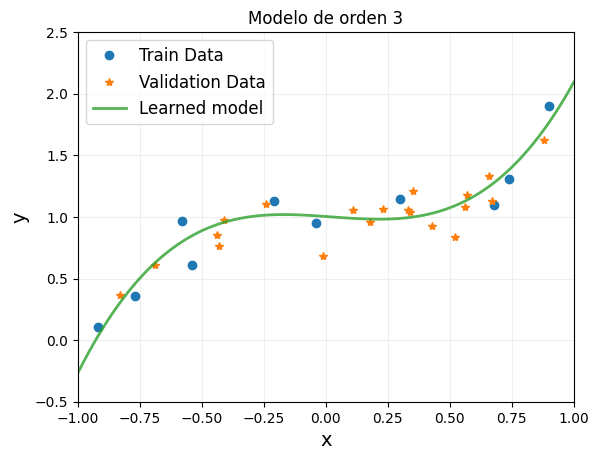

Los coeficientes del modelo ajustado son:
 [ 1.326 -0.091 -0.145  1.004] 

---

El modelo ajustado es:
        3           2
1.326 x - 0.09076 x - 0.1449 x + 1.004 

---

El MSE de entrenamiento es:    0.020 

---

El MSE de validación es:    0.033 

---



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

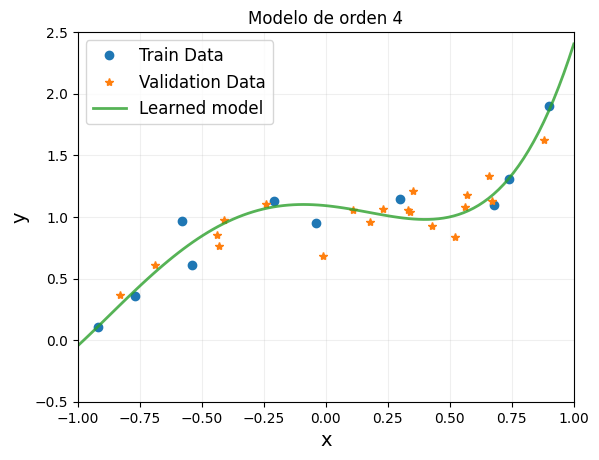

Los coeficientes del modelo ajustado son:
 [ 1.02   1.425 -0.932 -0.2    1.091] 

---

El modelo ajustado es:
       4         3         2
1.02 x + 1.425 x - 0.932 x - 0.2004 x + 1.091 

---

El MSE de entrenamiento es:    0.015 

---

El MSE de validación es:    0.038 

---



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

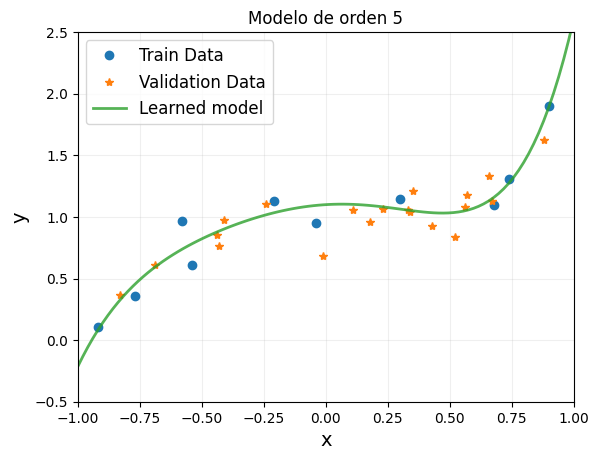

Los coeficientes del modelo ajustado son:
 [ 1.245  1.048  0.045 -0.951  0.122  1.1  ] 

---

El modelo ajustado es:
        5         4           3          2
1.245 x + 1.048 x + 0.04529 x - 0.9512 x + 0.1219 x + 1.1 

---

El MSE de entrenamiento es:    0.013 

---

El MSE de validación es:    0.038 

---



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

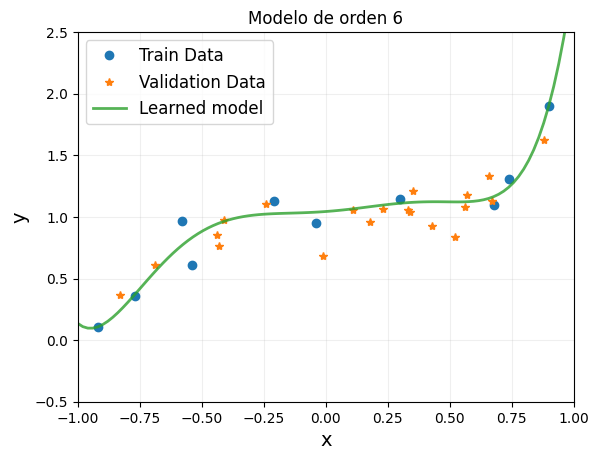

Los coeficientes del modelo ajustado son:
 [ 3.488  1.208 -3.46   0.06   0.481  0.149  1.044] 

---

El modelo ajustado es:
        6         5        4           3          2
3.488 x + 1.208 x - 3.46 x + 0.05987 x + 0.4809 x + 0.1493 x + 1.044 

---

El MSE de entrenamiento es:    0.011 

---

El MSE de validación es:    0.041 

---



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

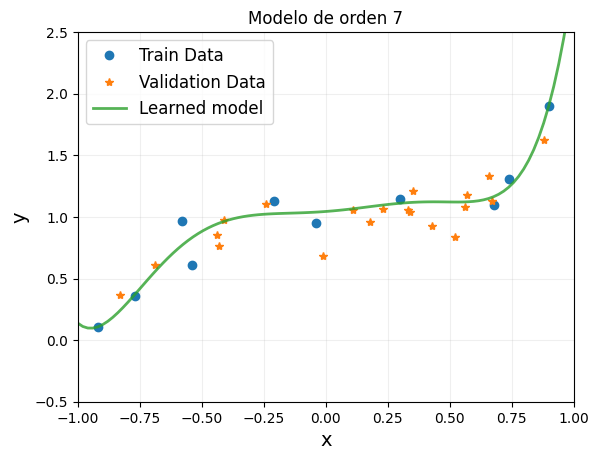

Los coeficientes del modelo ajustado son:
 [-0.05   3.47   1.281 -3.437  0.03   0.473  0.152  1.044] 

---

El modelo ajustado es:
           7        6         5         4           3          2
-0.05019 x + 3.47 x + 1.281 x - 3.437 x + 0.03021 x + 0.4729 x + 0.152 x + 1.044 

---

El MSE de entrenamiento es:    0.011 

---

El MSE de validación es:    0.041 

---



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

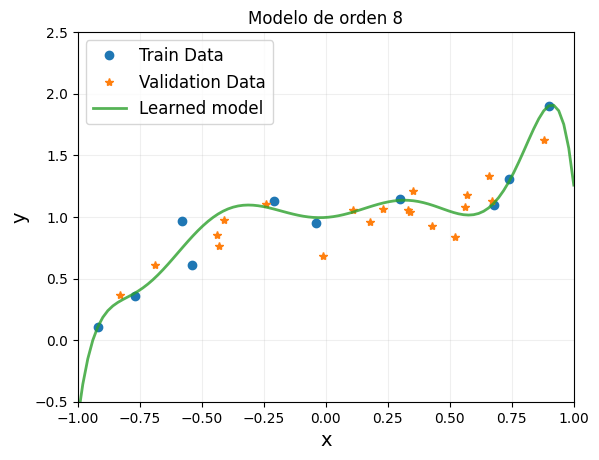

Los coeficientes del modelo ajustado son:
 [-19.498  -3.91   34.692   6.016 -18.615  -1.294   2.737   0.135   0.996] 

---

El modelo ajustado es:
        8        7         6         5         4         3         2
-19.5 x - 3.91 x + 34.69 x + 6.016 x - 18.61 x - 1.294 x + 2.737 x + 0.135 x + 0.9958 

---

El MSE de entrenamiento es:    0.011 

---

El MSE de validación es:    0.047 

---



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

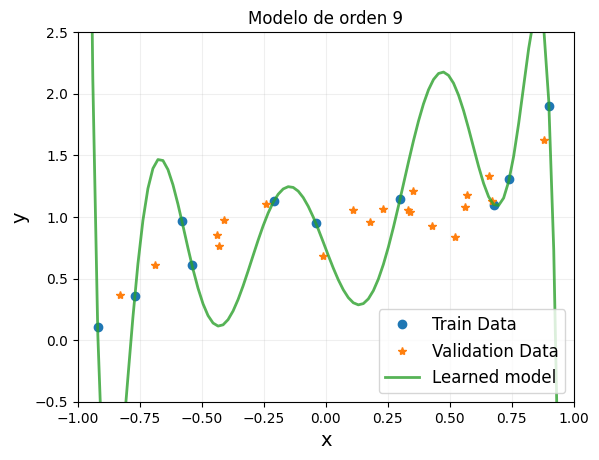

Los coeficientes del modelo ajustado son:
 [-4.314e+02  1.767e+01  7.927e+02 -2.815e+01 -4.784e+02  9.386e+00
  1.053e+02  1.091e+00 -5.306e+00  7.414e-01] 

---

El modelo ajustado es:
         9         8         7         6         5         4         3
-431.4 x + 17.67 x + 792.7 x - 28.15 x - 478.4 x + 9.386 x + 105.3 x
          2
 + 1.091 x - 5.306 x + 0.7414 

---

El MSE de entrenamiento es:    0.000 

---

El MSE de validación es:    1.070 

---



<IPython.core.display.Javascript object>

In [ ]:
tbVal = widgets.TabBar([str(order) for order in orders])

MSE_Train = dict.fromkeys(orders)
MSE_Val = dict.fromkeys(orders)

orders = range(1, 10)

for order in orders:
  with tbVal.output_to(str(order), select= (order < 2)):

    p = np.poly1d(np.polyfit(xTrain, yTrain, int(order)))

    # Calcula el error de entrenamiento
    yPredTrain = p(xTrain)
    errorTrain = yTrain - yPredTrain
    errorSqTrain = errorTrain**2
    MSE_Train[order] = np.sum(errorSqTrain) / 10

    # Calcula el error de validación
    yPredVal = p(xVal)
    errorVal = yVal - yPredVal
    errorSqVal = errorVal**2
    MSE_Val[order] = np.sum(errorSqVal) / 10

    # Visualiza el modelo y los datos
    plt.plot(xTrain, yTrain, 'o', label='Train Data')
    plt.plot(xVal, yVal, '*', label='Validation Data')
    plt.plot(x_LS, p(x_LS), '-', alpha=0.8, label='Learned model', linewidth=2)
    plt.xlabel("x", fontsize=14)
    plt.ylabel("y", fontsize=14)
    plt.xlim(-1, 1)
    plt.ylim(-0.5, 2.5)
    plt.grid(alpha=0.2)
    plt.legend(fontsize=12)
    plt.title(f"Modelo de orden {order}")
    plt.show()

  # complementa  la informacion respectova

    print('Los coeficientes del modelo ajustado son:\n {} \n\n---\n'.format(p.c))
    print('El modelo ajustado es:\n {} \n\n---\n'.format(p))
    print('El MSE de entrenamiento es: {:8.3f} \n\n---\n'.format(MSE_Train[order]))
    print('El MSE de validación es: {:8.3f} \n\n---\n'.format(MSE_Val[order]))


Explora todos los resultados que has generado y compara las cifras, los valores de MSE de entrenamiento y los valores de MSE de validación. Vale la pena prestar un poco más de atención al polinomio de grado 9. ¿Podría decir visualmente que su desempeño es excelente en el conjunto de datos de entrenamiento pero muy pobre en el conjunto de datos de validación?

**grafica el MSE de entrenamiento y validación contra el orden del polinomio.**

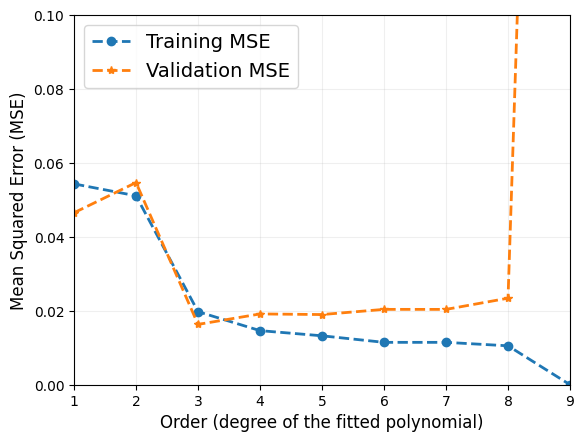

In [ ]:
plt.plot(orders, list(MSE_Train.values()), '--o', label='Training MSE', linewidth=2)
plt.plot(orders, list(MSE_Val.values()), '--*', label='Validation MSE', linewidth=2)

plt.xlabel("Order (degree of the fitted polynomial)", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.xlim(1,9)
plt.ylim(0,0.1)
plt.grid(alpha=0.2)
plt.legend(fontsize=14)
plt.show()




Echa un vistazo a la gráfica. El MSE de entrenamiento y el MSE de validación se comportan de manera bastante diferente a medida que aumentamos la complejidad (grado) de nuestros modelos. Específicamente, el MSE de entrenamiento disminuye, mientras que el MSE de validación primero disminuye y luego aumenta.

¿Puedes decir qué modelos son inadecuados?
¿Qué modelos están sobreajustados?

El polinomio cúbico parece ser la mejor opción. La validación nos ha permitido identificar la complejidad adecuada para nuestro modelo polinomial. Solo usamos la validación para *la selección del modelo*.

¿Cuál debería ser nuestro modelo final?

Dado que tenemos dos conjuntos de datos (entrenamiento y validación), podemos fusionarlos y producir un nuevo conjunto de datos de entrenamiento más grande. Con este nuevo conjunto de datos, podemos entrenar un nuevo modelo cúbico. Este es el modelo cúbico final que enviaríamos para probar.

**¿Puede crear una nueva celda de código donde ajuste un modelo cúbico a este nuevo conjunto de datos?**

In [ ]:
x = np.concatenate([xVal, xTrain])
y = np.concatenate([yVal, yTrain])

x_LS = np.linspace(-1,1,100).T

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

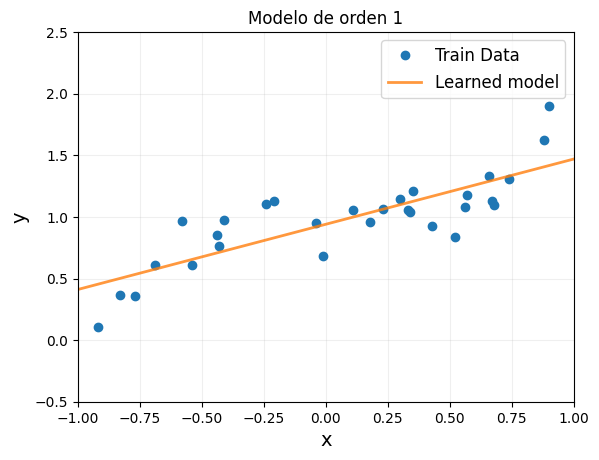

Los coeficientes del modelo ajustado son:
 [0.53 0.94] 

---

El modelo ajustado es:
  
0.5296 x + 0.9404 

---

El MSE de entrenamiento es:    0.041 

---



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

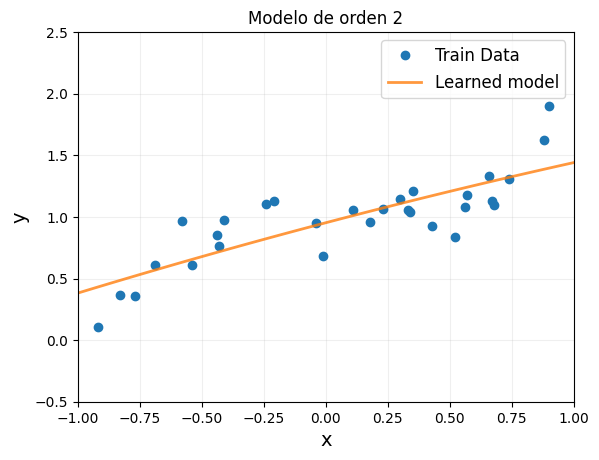

Los coeficientes del modelo ajustado son:
 [-0.041  0.53   0.953] 

---

El modelo ajustado es:
           2
-0.04135 x + 0.5296 x + 0.9528 

---

El MSE de entrenamiento es:    0.041 

---



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

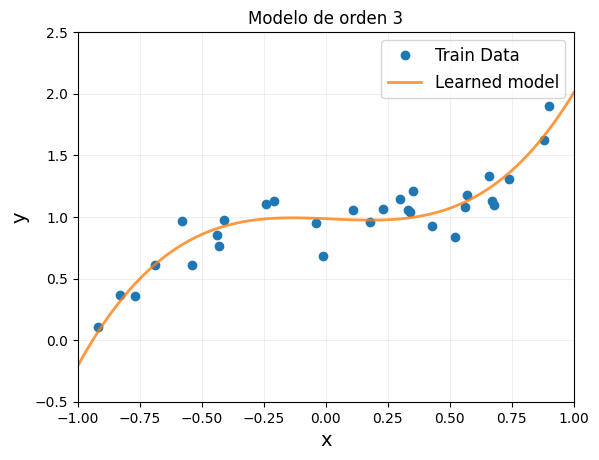

Los coeficientes del modelo ajustado son:
 [ 1.195 -0.086 -0.086  0.985] 

---

El modelo ajustado es:
        3           2
1.195 x - 0.08565 x - 0.0864 x + 0.9855 

---

El MSE de entrenamiento es:    0.017 

---



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

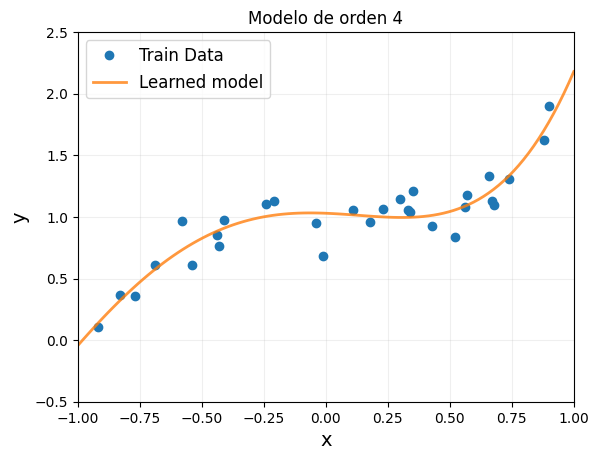

Los coeficientes del modelo ajustado son:
 [ 0.558  1.192 -0.521 -0.08   1.03 ] 

---

El modelo ajustado es:
         4         3          2
0.5583 x + 1.192 x - 0.5205 x - 0.08001 x + 1.03 

---

El MSE de entrenamiento es:    0.016 

---



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

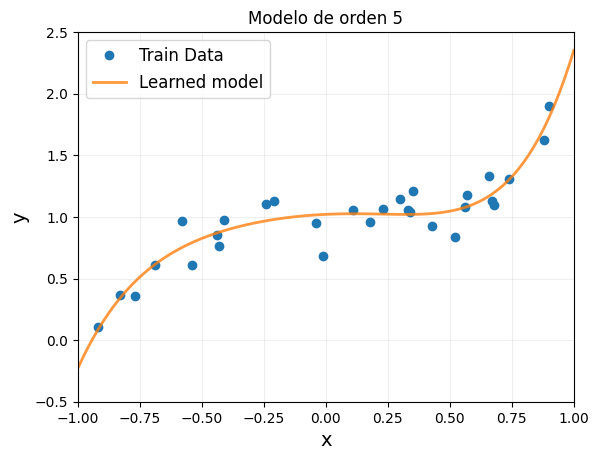

Los coeficientes del modelo ajustado son:
 [ 0.91   0.507  0.289 -0.466  0.092  1.021] 

---

El modelo ajustado es:
         5          4          3          2
0.9095 x + 0.5068 x + 0.2885 x - 0.4664 x + 0.09242 x + 1.021 

---

El MSE de entrenamiento es:    0.015 

---



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

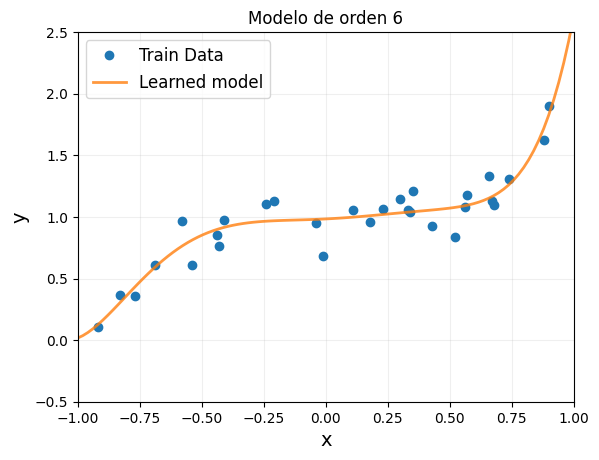

Los coeficientes del modelo ajustado son:
 [ 2.03   0.968 -1.963  0.239  0.274  0.1    0.984] 

---

El modelo ajustado es:
       6          5         4          3          2
2.03 x + 0.9685 x - 1.963 x + 0.2387 x + 0.2744 x + 0.1001 x + 0.9838 

---

El MSE de entrenamiento es:    0.015 

---



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

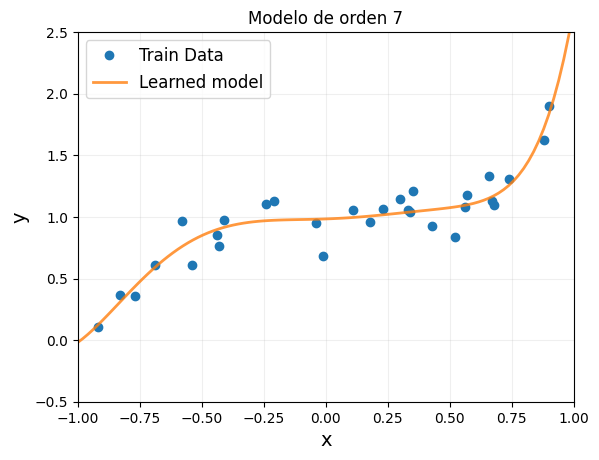

Los coeficientes del modelo ajustado son:
 [ 0.521  2.1    0.235 -2.037  0.528  0.29   0.072  0.984] 

---

El modelo ajustado es:
         7       6         5         4         3          2
0.5209 x + 2.1 x + 0.235 x - 2.037 x + 0.528 x + 0.2904 x + 0.07164 x + 0.9838 

---

El MSE de entrenamiento es:    0.015 

---



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

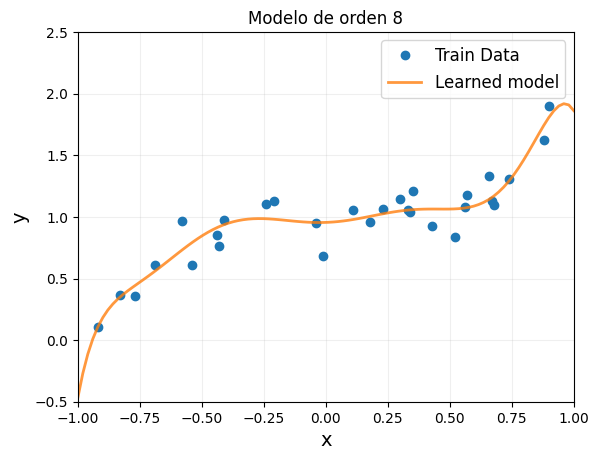

Los coeficientes del modelo ajustado son:
 [-9.133 -0.584 16.533  1.402 -9.02   0.278  1.361  0.071  0.955] 

---

El modelo ajustado es:
         8          7         6         5        4          3         2
-9.133 x - 0.5841 x + 16.53 x + 1.402 x - 9.02 x + 0.2781 x + 1.361 x + 0.07062 x + 0.9554 

---

El MSE de entrenamiento es:    0.014 

---



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

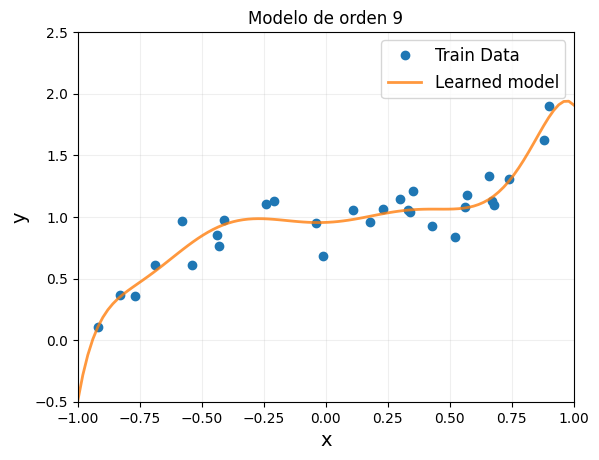

Los coeficientes del modelo ajustado son:
 [ 0.649 -9.042 -1.732 16.413  2.071 -8.975  0.134  1.356  0.079  0.955] 

---

El modelo ajustado es:
         9         8         7         6         5         4          3
0.6487 x - 9.042 x - 1.732 x + 16.41 x + 2.071 x - 8.975 x + 0.1335 x
          2
 + 1.356 x + 0.07941 x + 0.9555 

---

El MSE de entrenamiento es:    0.014 

---



<IPython.core.display.Javascript object>

In [ ]:
tbVal = widgets.TabBar([str(order) for order in orders])

MSE_Train = dict.fromkeys(orders)
MSE_Val = dict.fromkeys(orders)

orders = range(1, 10)

for order in orders:
  with tbVal.output_to(str(order), select= (order < 2)):

    p = np.poly1d(np.polyfit(x, y, int(order)))

    # Calcula el error de entrenamiento
    yPredTrain = p(x)
    errorTrain = y - yPredTrain
    errorSqTrain = errorTrain**2
    MSE_Train[order] = np.sum(errorSqTrain) / len(y)

    # Visualiza el modelo y los datos
    plt.plot(x, y, 'o', label='Train Data')
    plt.plot(x_LS, p(x_LS), '-', alpha=0.8, label='Learned model', linewidth=2)
    plt.xlabel("x", fontsize=14)
    plt.ylabel("y", fontsize=14)
    plt.xlim(-1, 1)
    plt.ylim(-0.5, 2.5)
    plt.grid(alpha=0.2)
    plt.legend(fontsize=12)
    plt.title(f"Modelo de orden {order}")
    plt.show()

  # complementa  la informacion respectova

    print('Los coeficientes del modelo ajustado son:\n {} \n\n---\n'.format(p.c))
    print('El modelo ajustado es:\n {} \n\n---\n'.format(p))
    print('El MSE de entrenamiento es: {:8.3f} \n\n---\n'.format(MSE_Train[order]))

# Regularización
Cuando ajustamos un modelo a un conjunto de datos de entrenamiento, sus coeficientes pueden tomar cualquier valor. Si restringiéramos el rango de valores que los coeficientes pueden adoptar, también estaríamos restringiendo el rango de formas que el modelo puede reproducir. En otras palabras, estaríamos haciendo el modelo más rígido.

La regularización es un conjunto de técnicas que añaden cierta rigidez a nuestros modelos al restringir el rango de valores que los coeficientes pueden adoptar. Ilustraremos la regularización en un problema de regresión que utiliza el MSE como métrica de calidad. En la regularización, en lugar de usar el MSE como nuestra métrica de calidad **durante el entrenamiento**, usamos una métrica modificada que incluye un término de regularización, por ejemplo:

$MSER = \frac{1}{N}\sum_{i=1}^N{e_i^2} + \lambda \sum_{k=1}^K w_k^2 = MSE + \lambda \times SSC$

Donde $N$ es el número de muestras. $K$ es el número de coeficientes  y $\lambda$  es el parámetro de regularización. Nuestro método de optimización intentará encontrar un modelo que haga tanto el MSE como el SSC lo más pequeños posible.
**¿Por qué hacemos esto?** Recuerda de secciones anteriores que los modelos con sobreajuste tenían grandes valores de SSC. Por lo tanto, nuestra esperanza es que al construir modelos con valores bajos de SSC, reduciremos el riesgo de sobreajuste.

El parámetro de regularización $\lambda$ nos indica cuán importante es para nosotros reducir el valor de **SSC** en comparación con el valor de MSE del entrenamiento. Si $\lambda$ es pequeño, nuestro método de optimización prestará más atención a reducir el valor del MSE. Si es grande, reducir el valor del SSC será más importante.


En esta sección ajustaremos el modelo polinomial de orden 9 utilizando este enfoque de regularización. En la siguiente celda, implementamos la solución exacta de mínimos cuadrados con regularización y obtenemos la solución de mínimos cuadrados regularizados para diferentes valores de lambda:

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

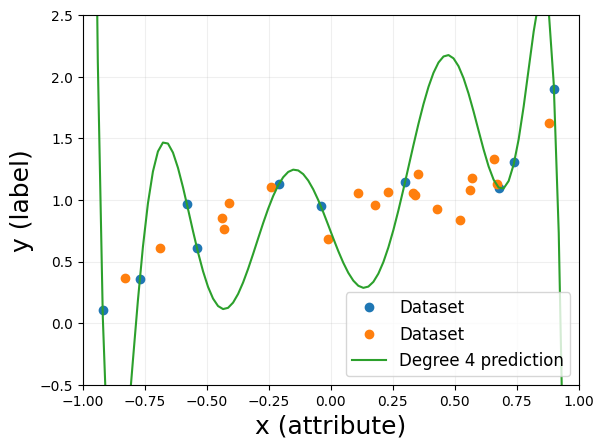

Los coeficientes del modelo ajustado son:
 [ 7.414e-01 -5.306e+00  1.091e+00  1.053e+02  9.386e+00 -4.784e+02
 -2.815e+01  7.927e+02  1.767e+01 -4.314e+02] 

---

El MSE de entrenamiento es:    0.000 

---

El MSE de validación es:    0.535 

---

El SSC es: 1055644.074


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

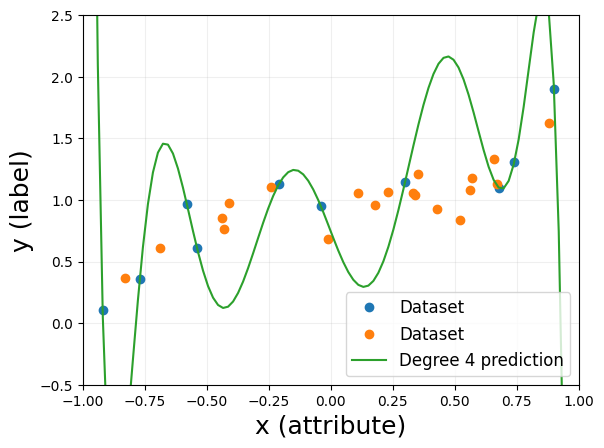

Los coeficientes del modelo ajustado son:
 [ 7.440e-01 -5.251e+00  1.108e+00  1.042e+02  9.101e+00 -4.735e+02
 -2.751e+01  7.847e+02  1.729e+01 -4.271e+02] 

---

El MSE de entrenamiento es:    0.000 

---

El MSE de validación es:    0.524 

---

El SSC es: 1034448.519


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

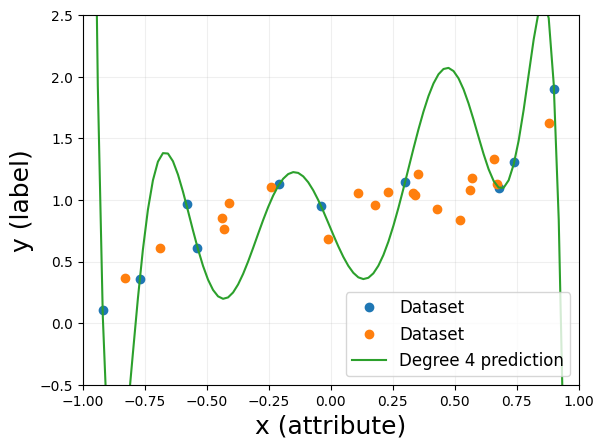

Los coeficientes del modelo ajustado son:
 [   0.765   -4.802    1.24    95.439    6.773 -433.826  -22.232  719.558
   14.141 -391.899] 

---

El MSE de entrenamiento es:    0.000 

---

El MSE de validación es:    0.442 

---

El SSC es: 869426.988


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

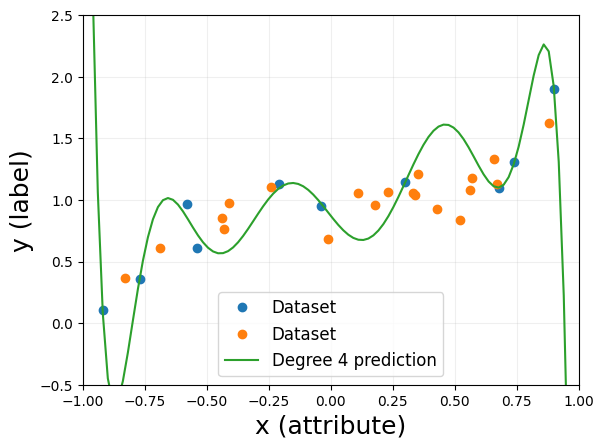

Los coeficientes del modelo ajustado son:
 [   0.871   -2.555    1.879   51.64    -4.728 -235.371    3.865  393.972
   -1.416 -215.867] 

---

El MSE de entrenamiento es:    0.003 

---

El MSE de validación es:    0.142 

---

El SSC es: 259928.604


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

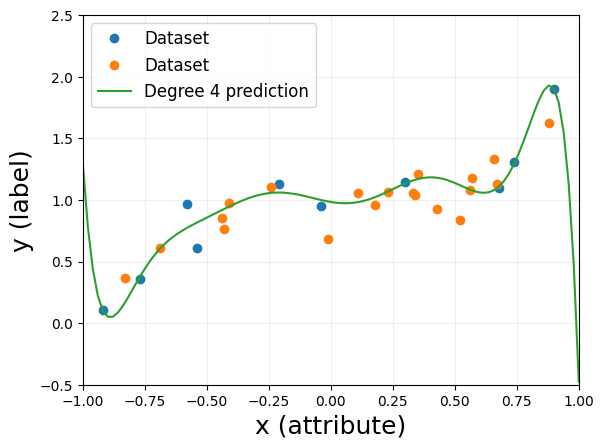

Los coeficientes del modelo ajustado son:
 [  0.984  -0.333   2.181   8.606 -13.972 -40.343  25.396  73.643 -14.175
 -42.461] 

---

El MSE de entrenamiento es:    0.009 

---

El MSE de validación es:    0.025 

---

El SSC es: 9974.710


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

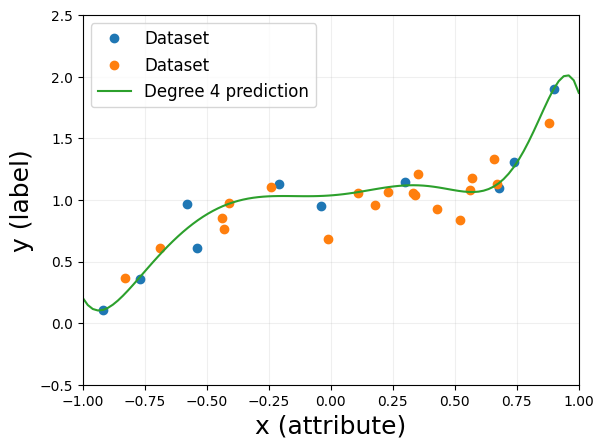

Los coeficientes del modelo ajustado son:
 [ 1.037  0.149  0.937  0.27  -7.494 -2.279 12.991  9.495 -6.434 -6.802] 

---

El MSE de entrenamiento es:    0.011 

---

El MSE de validación es:    0.021 

---

El SSC es:  409.998


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

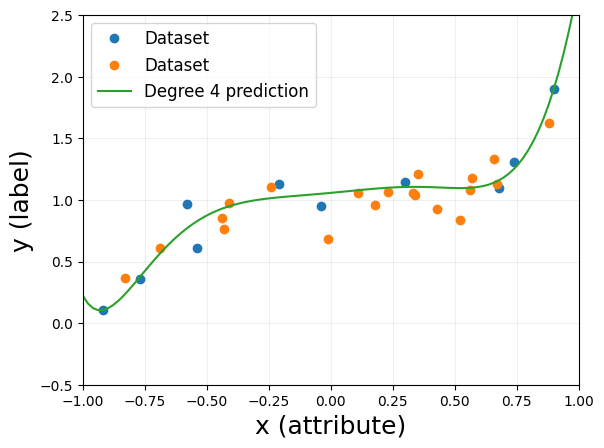

Los coeficientes del modelo ajustado son:
 [ 1.057  0.187  0.121 -0.234 -2.203  1.209  2.169  1.541  0.348 -1.434] 

---

El MSE de entrenamiento es:    0.011 

---

El MSE de validación es:    0.020 

---

El SSC es:   16.795


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

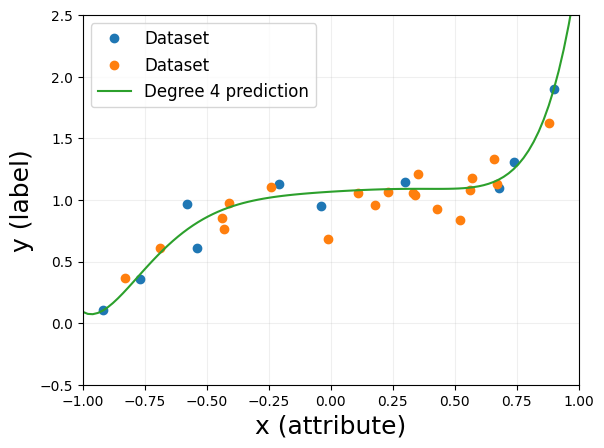

Los coeficientes del modelo ajustado son:
 [ 1.067  0.127 -0.159  0.184 -1.006  0.826  0.484  0.506  1.117 -0.233] 

---

El MSE de entrenamiento es:    0.012 

---

El MSE de validación es:    0.019 

---

El SSC es:    4.700


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

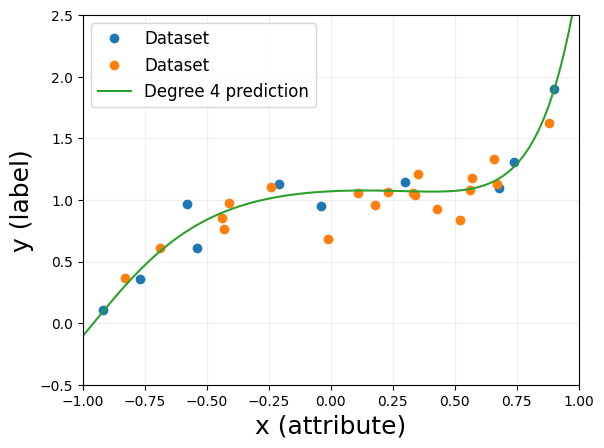

Los coeficientes del modelo ajustado son:
 [ 1.07   0.099 -0.44   0.4   -0.178  0.473  0.322  0.332  0.573  0.147] 

---

El MSE de entrenamiento es:    0.012 

---

El MSE de validación es:    0.018 

---

El SSC es:    2.330


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

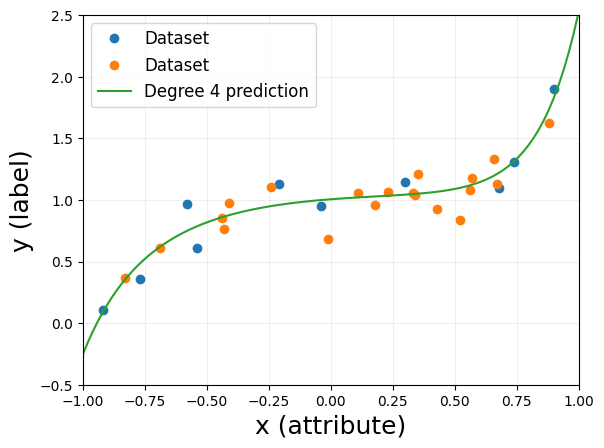

Los coeficientes del modelo ajustado son:
 [ 1.005  0.156 -0.219  0.354 -0.005  0.351  0.147  0.298  0.21   0.235] 

---

El MSE de entrenamiento es:    0.016 

---

El MSE de validación es:    0.015 

---

El SSC es:    1.540


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

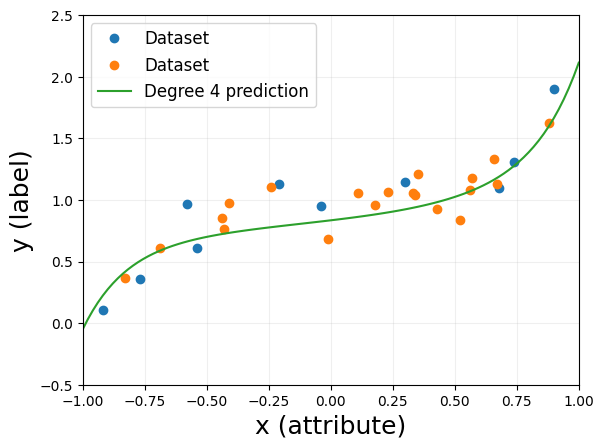

Los coeficientes del modelo ajustado son:
 [0.835 0.24  0.098 0.264 0.042 0.23  0.031 0.191 0.027 0.156] 

---

El MSE de entrenamiento es:    0.038 

---

El MSE de validación es:    0.023 

---

El SSC es:    0.951


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

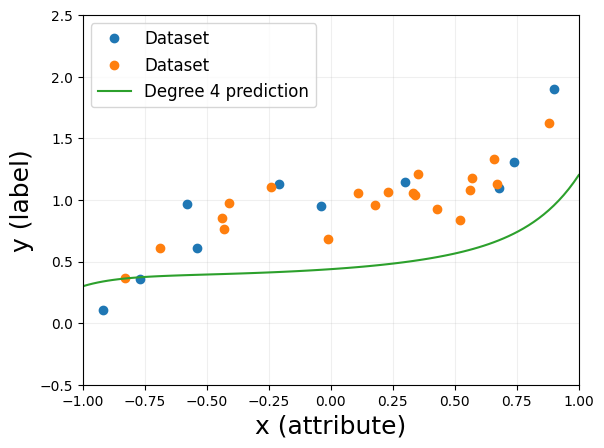

Los coeficientes del modelo ajustado son:
 [0.438 0.136 0.143 0.111 0.081 0.086 0.053 0.067 0.037 0.052] 

---

El MSE de entrenamiento es:    0.304 

---

El MSE de validación es:    0.264 

---

El SSC es:    0.268


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

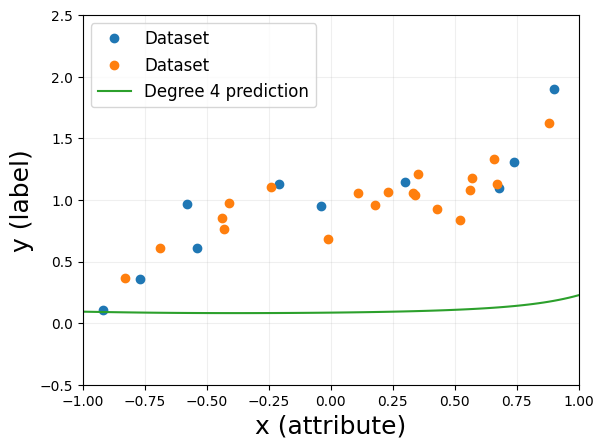

Los coeficientes del modelo ajustado son:
 [0.085 0.021 0.033 0.017 0.02  0.013 0.013 0.01  0.009 0.007] 

---

El MSE de entrenamiento es:    0.935 

---

El MSE de validación es:    0.859 

---

El SSC es:    0.010


<IPython.core.display.Javascript object>

In [ ]:
myLambdas =[0, 10**-10, 10**-9, 10**-8, 10**-7, 10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 10]

tbReg = widgets.TabBar([str(myLambda) for myLambda in myLambdas])

MSE_Train = dict.fromkeys(myLambdas)
MSE_Val = dict.fromkeys(myLambdas)

for myLambda in myLambdas:
  with tbReg.output_to(str(myLambda), select= (myLambda < 2)):

    XTrain = np.column_stack([np.ones(xTrain.shape), xTrain, xTrain**2, xTrain**3, xTrain**4, xTrain**5, xTrain**6, xTrain**7, xTrain**8, xTrain**9])
    XVal = np.column_stack([np.ones(xVal.shape), xVal, xVal**2, xVal**3, xVal**4, xVal**5, xVal**6, xVal**7, xVal**8, xVal**9])
    w = np.dot(np.dot(np.linalg.inv(np.dot(XTrain.T, XTrain) + 10*myLambda*np.identity(10)), XTrain.T), yTrain)

    X_LS = np.column_stack([np.ones(x_LS.shape), x_LS, x_LS**2, x_LS**3, x_LS**4, x_LS**5, x_LS**6, x_LS**7, x_LS**8, x_LS**9])
    y_LS = np.dot(X_LS, w)

    MSE_Train[myLambda] = np.sum((yTrain - np.dot(XTrain, w))**2)/10
    MSE_Val[myLambda] = np.sum((yVal - np.dot(XVal, w))**2)/20

    plt.plot(xTrain, yTrain, 'o', label="Dataset")
    plt.plot(xVal, yVal, 'o', label="Dataset")
    plt.plot(x_LS, y_LS, label="Degree 4 prediction")
    plt.xlabel("x (attribute)", fontsize=18)
    plt.ylabel("y (label)", fontsize=18)
    plt.xlim(-1,1)
    plt.ylim(-0.5,2.5)
    plt.grid(alpha=0.2)
    plt.legend(fontsize=12)
    plt.show()

    print('Los coeficientes del modelo ajustado son:\n {} \n\n---\n'.format(w))
    print('El MSE de entrenamiento es: {:8.3f} \n\n---\n'.format(MSE_Train[myLambda]))
    print('El MSE de validación es: {:8.3f} \n\n---\n'.format(MSE_Val[myLambda]))
    print("El SSC es: {:8.3f}".format(sum(w**2)))

Observe que a medida que aumentamos el valor de lambda, la complejidad del modelo ajustado disminuye. Los valores de SSC también disminuyen, ya que la optimización se centrará más en reducir los valores de SSC. Cuando lambda es 10, el modelo resultante es prácticamente un modelo constante y el SSC es cercano a 0. ¿Tiene sentido este resultado para usted?

Podemos trazar los valores de entrenamiento y validación como una función de lambda. Podemos ver que el MSE de validación decrece dramáticamente entre los valores  $10^{-7}$ y $10^{-2}$ , lo que indica que hemos evitado con éxito el sobreajuste dentro de este rango. Compare estos resultados con los modelos trazados anteriormente.

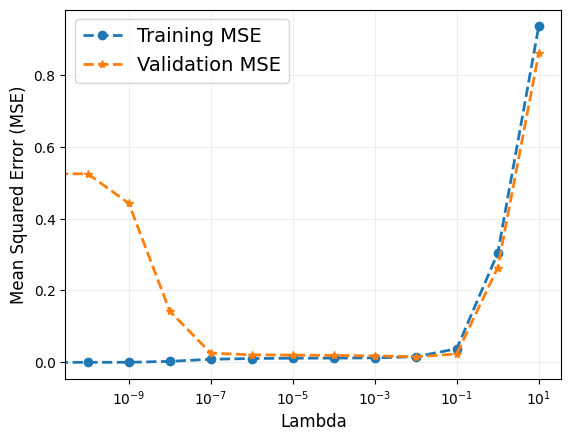

In [ ]:
plt.plot(myLambdas, list(MSE_Train.values()), '--o', label='Training MSE', linewidth=2, )
plt.plot(myLambdas, list(MSE_Val.values()), '--*', label='Validation MSE', linewidth=2, )

plt.xlabel("Lambda", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=12)
plt.grid(alpha=0.2)
plt.legend(fontsize=14)
plt.xscale('log')
plt.show()

# listo para un desafío?

Recopile los conjuntos de datos de entrenamiento y validación en un solo conjunto de datos y ejecute los siguientes pasos varias veces (por ejemplo, 15 veces):

1. Divida **aleatoriamente** este conjunto de datos en un nuevo conjunto de datos de entrenamiento que contenga 10 muestras y un conjunto de datos de validación que contenga 20 muestras.
2. Ajuste un modelo lineal y un modelo polinomial de grado 9 al conjunto de datos de entrenamiento y almacene los coeficientes resultantes.
3. Obtener y almacenar el MSE de entrenamiento y validación de cada modelo.

Al hacer esto, habrás obtenido 15 polinomios lineales y de grado 9 diferentes. Trace todos los modelos lineales en un gráfico y todos los modelos polinómicos de grado 9 en otro.
¿Qué tan diferentes son los modelos lineales entre sí?
¿Y los modelos polinómicos de 9 grados?
¿Qué pasa con los valores de MSE, son siempre los mismos? ¿qué está sucediendo?

In [ ]:
x = np.concatenate([xVal, xTrain])
y = np.concatenate([yVal, yTrain])

num_iterations = 15

coefficients_linear = []
mse_train_linear = []
mse_val_linear = []

coefficients_poly9 = []
mse_train_poly9 = []
mse_val_poly9 = []

# Itera sobre el número de repeticiones
for iteration in range(num_iterations):

    # Paso 1: Dividir aleatoriamente el conjunto de datos
    indices = np.random.permutation(len(x))
    x_train = x[indices[:10]]
    y_train = y[indices[:10]]
    x_val = x[indices[10:]]
    y_val = y[indices[10:]]

    # Paso 2: Ajustar un modelo lineal
    p_linear = np.poly1d(np.polyfit(x_train, y_train, 1))
    coefficients_linear.append(p_linear.c)

    # Calcular el MSE de entrenamiento y validación para el modelo lineal
    yPredTrain_l = p_linear(x_train)
    errorTrain_l = y_train - yPredTrain_l
    errorSqTrain_l = errorTrain_l**2
    mse_train_linear.append(np.sum(errorSqTrain_l) / len(y_train))

    yPredVal_l = p_linear(x_val)
    errorVal_l = y_val - yPredVal_l
    errorSqVal_l = errorVal_l**2
    mse_val_linear.append(np.sum(errorSqVal_l) / len(y_val))

    # Paso 3: Ajustar un modelo polinómico de grado 9
    p_poly9 = np.poly1d(np.polyfit(x_train, y_train, 9))
    coefficients_poly9.append(p_poly9.c)

    yPredTrain_poly9 = p_poly9(x_train)
    errorTrain_poly9 = y_train - yPredTrain_poly9
    errorSqTrain_poly9 = errorTrain_poly9**2
    mse_train_poly9.append(np.sum(errorSqTrain_poly9) / len(y_train))

    yPredVal_poly9 = p_poly9(x_val)
    errorVal_poly9 = y_val - yPredVal_poly9
    errorSqVal_poly9 = errorVal_poly9**2
    mse_val_poly9.append(np.sum(errorSqVal_poly9) / len(y_val))


# Resumen

En esta práctica de laboratorio, hemos explorado **el sobreajuste** mediante un conjunto de datos simple. El sobreajuste es un concepto clave y describe la situación en la que nuestros modelos funcionan muy bien en el conjunto de datos de entrenamiento, pero tienen un rendimiento de implementación deficiente. Para evaluar el rendimiento de la implementación, utilizamos un conjunto de datos que consta de muestras que nuestro modelo no ha visto antes.

El sobreajuste suele ocurrir en situaciones en las que nuestro conjunto de datos es pequeño y nuestro modelo es muy complejo. Tenga en cuenta que un polinomio de orden 9 tiene 10 coeficientes y nuestro conjunto de datos de entrenamiento constaba de 10 muestras. Esto puede verse como un problema con 10 incógnitas (coeficientes) y 10 ecuaciones (una por muestra). Por lo tanto, podríamos esperar encontrar una solución capaz de predecir cada muestra individual en el conjunto de datos de entrenamiento.

Hemos implementado un **enfoque de validación** simple para seleccionar el grado correcto para nuestro modelo polinomial. Este objetivo a veces se denomina **selección de modelos** y no debe confundirse con el **entrenamiento de modelos**, en el que ajustamos una familia de modelos. Finalmente, hemos usado la regularización para penalizar modelos con coeficientes grandes. Al hacer esto, esperamos agregar rigidez a nuestros modelos y reducir el riesgo de sobreajuste.

Recuerda que este es tu cuaderno. Puede explorar más a fondo los ejemplos que le proporcionamos, realizar cambios, mejorarlos y ser creativo. Tienes una excelente oportunidad para preguntarte "qué pasaría si" y experimentar. No es necesario que te limites al guión.

# Predicción del precio de automóviles en Londres utilizando regresión lineal

Bueno y ahora tenemos el siguiente dataset **LondonCars2014.csv** que  contiene información sobre diferentes autos, específicamente:
1. Marca
2. Modelo
3. Año
4. Kilometraje
5. Precio
6. Estilo de carrocería
7. Color exterior
8. Color interior
9. Motor
10. Transmisión
11. Número de puertas

**Objetivo**: Predecir el precio de los automóviles en Londres basándose en sus características, utilizando técnicas de regresión lineal y polinomial, y explorando la regularización para mejorar la precisión del modelo y evitar el sobreajuste.

1. Análisis exploratorio de datos.
2. Construcción del modelo de regresión lineal.
3. Construcción del modelo de regresión polinomial.
4. Evaluar el rendimiento de los modelo y comparalos entre si.
5. Ajustar modelos con regularización y comparar su rendimiento con los modelos sin regularización



              Year        Mileage          Price        Doors
count  9080.000000    9080.000000    9080.000000  9080.000000
mean   2010.498018   41875.531057   24410.926652     3.821035
std       2.773451   33146.564303   16300.355339     0.561866
min    1990.000000       1.000000    1490.000000     2.000000
25%    2010.000000   20112.250000   15987.750000     4.000000
50%    2011.000000   33532.000000   21500.000000     4.000000
75%    2012.000000   52564.500000   28998.000000     4.000000
max    2015.000000  279950.000000  499898.000000     4.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9080 entries, 0 to 9079
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Make          9080 non-null   object
 1   Model         9080 non-null   object
 2   Year          9080 non-null   int64 
 3   Mileage       9080 non-null   int64 
 4   Price         9080 non-null   int64 
 5   Body Style    9080 non-null   object

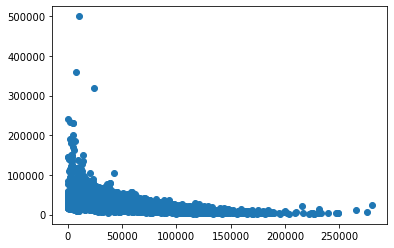

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

data = pd.read_csv('LondonCars2014.csv')

print(data.describe())
print(data.info())

plt.scatter(data['Mileage'], data['Price'])
plt.show()

/tmp/ipykernel_3042/3615375555.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


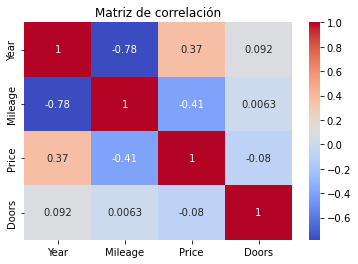

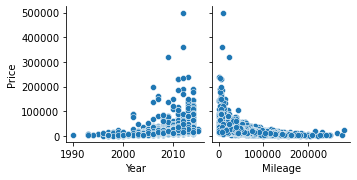

In [42]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

# Visualizar algunas relaciones importantes
sns.pairplot(data, x_vars=['Year', 'Mileage'], y_vars=['Price'], kind='scatter')
plt.show()

In [67]:
x = data[['Year', 'Mileage']]
y = data['Price']

xTrain, xVal, yTrain, yVal = train_test_split(x, y, test_size=0.2, random_state=42)

El MSE de entrenamiento es:  242974401.0499871
El MSE de prueba es:  175542680.3401982


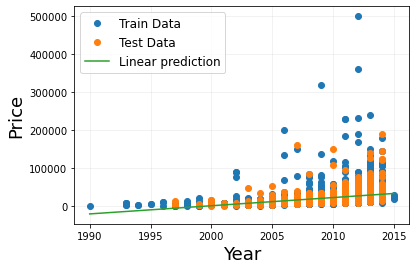

In [68]:
# Construccion modelo de regresion lineal con poly1d y polyfit
p = np.poly1d(np.polyfit(xTrain['Year'], yTrain, 1))

yPredTrain = p(xTrain['Year'])
errorTrain = yTrain - yPredTrain
errorSqTrain = errorTrain**2
MSETrain = np.sum(errorSqTrain) / len(yTrain)

yPredTest = p(xVal['Year'])
errorTest = yVal - yPredTest
errorSqTest = errorTest**2
MSETest = np.sum(errorSqTest) / len(yVal)

print("El MSE de entrenamiento es: ", MSETrain)
print("El MSE de prueba es: ", MSETest)

x_LS = np.linspace(1990, 2015, 100).T
y_LS = p(x_LS)

plt.plot(xTrain['Year'], yTrain, 'o', label="Train Data")
plt.plot(xVal['Year'], yVal, 'o', label="Test Data")
plt.plot(x_LS, y_LS, label="Linear prediction")
plt.xlabel("Year", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.grid(alpha=0.2)
plt.legend(fontsize=12)
plt.show()

El MSE de entrenamiento para el modelo de orden 1 es: 242974401.0499871
El MSE de prueba para el modelo de orden 1 es: 175542680.3401982


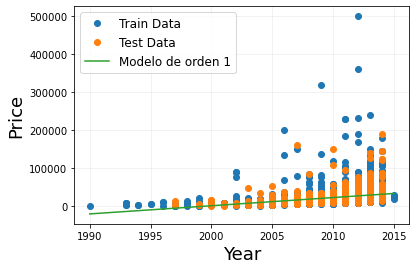

Los coeficientes del modelo ajustado son:
 [ 2.151e+03 -4.301e+06] 

---

El modelo ajustado es:
  
2151 x - 4.301e+06 

---

El MSE de entrenamiento es: 242974401.050 

---

El MSE de prueba es: 175542680.340 

---

El MSE de entrenamiento para el modelo de orden 2 es: 241061162.80660358
El MSE de prueba para el modelo de orden 2 es: 173557609.5889045


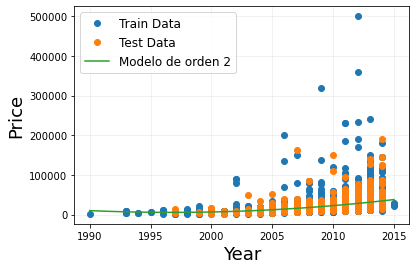

Los coeficientes del modelo ajustado son:
 [ 9.718e+01 -3.881e+05  3.875e+08] 

---

El modelo ajustado es:
        2
97.18 x - 3.881e+05 x + 3.875e+08 

---

El MSE de entrenamiento es: 241061162.807 

---

El MSE de prueba es: 173557609.589 

---

El MSE de entrenamiento para el modelo de orden 3 es: 240982094.33282524
El MSE de prueba para el modelo de orden 3 es: 173317273.41064528


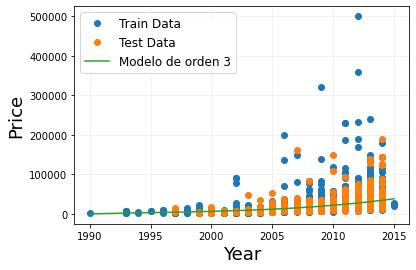

Los coeficientes del modelo ajustado son:
 [ 2.916e+00 -1.745e+04  3.482e+07 -2.315e+10] 

---

El modelo ajustado es:
        3             2
2.916 x - 1.745e+04 x + 3.482e+07 x - 2.315e+10 

---

El MSE de entrenamiento es: 240982094.333 

---

El MSE de prueba es: 173317273.411 

---

El MSE de entrenamiento para el modelo de orden 4 es: 240751438.49082482
El MSE de prueba para el modelo de orden 4 es: 172790814.0760177


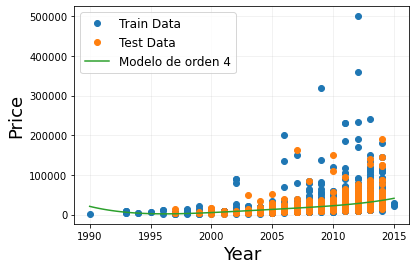

Los coeficientes del modelo ajustado son:
 [ 8.005e-01 -6.417e+03  1.929e+07 -2.577e+10  1.291e+13] 

---

El modelo ajustado es:
         4        3             2
0.8005 x - 6417 x + 1.929e+07 x - 2.577e+10 x + 1.291e+13 

---

El MSE de entrenamiento es: 240751438.491 

---

El MSE de prueba es: 172790814.076 

---

El MSE de entrenamiento para el modelo de orden 5 es: 240750344.11326498
El MSE de prueba para el modelo de orden 5 es: 172788592.24895468


/home/laura/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


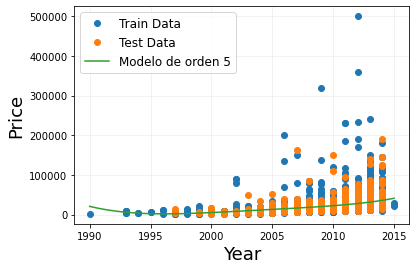

Los coeficientes del modelo ajustado son:
 [ 1.998e-04 -1.200e+00  1.594e+03  3.249e+06 -9.713e+09  6.481e+12] 

---

El modelo ajustado es:
            5       4        3             2
0.0001998 x - 1.2 x + 1594 x + 3.249e+06 x - 9.713e+09 x + 6.481e+12 

---

El MSE de entrenamiento es: 240750344.113 

---

El MSE de prueba es: 172788592.249 

---

El MSE de entrenamiento para el modelo de orden 6 es: 240749242.9060068
El MSE de prueba para el modelo de orden 6 es: 172786354.65647525


/home/laura/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


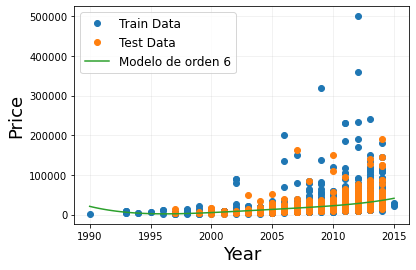

Los coeficientes del modelo ajustado son:
 [ 5.439e-08 -2.537e-04  6.930e-02  8.786e+02  3.087e+05 -4.142e+09
  3.549e+12] 

---

El modelo ajustado es:
            6             5          4         3             2
5.439e-08 x - 0.0002537 x + 0.0693 x + 878.6 x + 3.087e+05 x - 4.142e+09 x + 3.549e+12 

---

El MSE de entrenamiento es: 240749242.906 

---

El MSE de prueba es: 172786354.656 

---

El MSE de entrenamiento para el modelo de orden 7 es: 240748142.5299366
El MSE de prueba para el modelo de orden 7 es: 172784133.6748762


/home/laura/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


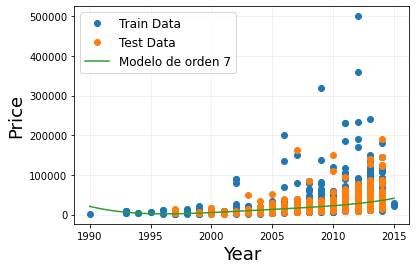

Los coeficientes del modelo ajustado son:
 [ 1.584e-11 -5.870e-08 -2.820e-05  1.633e-01  3.330e+02 -2.141e+05
 -1.933e+09  2.078e+12] 

---

El modelo ajustado es:
            7            6            5          4       3             2
1.584e-11 x - 5.87e-08 x - 2.82e-05 x + 0.1633 x + 333 x - 2.141e+05 x - 1.933e+09 x + 2.078e+12 

---

El MSE de entrenamiento es: 240748142.530 

---

El MSE de prueba es: 172784133.675 

---

El MSE de entrenamiento para el modelo de orden 8 es: 240747037.99923182
El MSE de prueba para el modelo de orden 8 es: 172781899.0962791


/home/laura/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


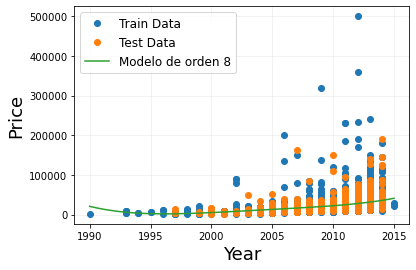

Los coeficientes del modelo ajustado son:
 [ 4.864e-15 -1.454e-11 -1.559e-08  2.474e-05  1.016e-01  1.043e+02
 -2.472e+05 -9.662e+08  1.284e+12] 

---

El modelo ajustado es:
            8             7             6             5          4
4.864e-15 x - 1.454e-11 x - 1.559e-08 x + 2.474e-05 x + 0.1016 x
          3             2
 + 104.3 x - 2.472e+05 x - 9.662e+08 x + 1.284e+12 

---

El MSE de entrenamiento es: 240747037.999 

---

El MSE de prueba es: 172781899.096 

---

El MSE de entrenamiento para el modelo de orden 9 es: 240745932.30380517
El MSE de prueba para el modelo de orden 9 es: 172779659.0061072


/home/laura/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


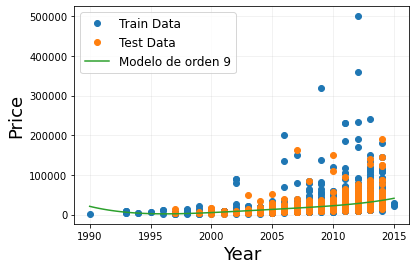

Los coeficientes del modelo ajustado son:
 [ 1.561e-18 -3.793e-15 -5.980e-12  1.913e-09  2.518e-05  5.134e-02
  1.862e+01 -1.928e+05 -5.091e+08  8.284e+11] 

---

El modelo ajustado es:
            9             8            7             6             5
1.561e-18 x - 3.793e-15 x - 5.98e-12 x + 1.913e-09 x + 2.518e-05 x
            4         3             2
 + 0.05134 x + 18.62 x - 1.928e+05 x - 5.091e+08 x + 8.284e+11 

---

El MSE de entrenamiento es: 240745932.304 

---

El MSE de prueba es: 172779659.006 

---



In [58]:
orders = range(1, 10)

for order in orders:
    p = np.poly1d(np.polyfit(xTrain['Year'], yTrain, int(order)))
    
    yPredTrain = p(xTrain['Year'])
    errorTrain = yTrain - yPredTrain
    errorSqTrain = errorTrain**2
    MSE_Train = np.sum(errorSqTrain) / len(yTrain)
    
    yPredTest = p(xVal['Year'])
    errorTest = yVal - yPredTest
    errorSqTest = errorTest**2
    MSE_Test = np.sum(errorSqTest) / len(yVal)
    
    print(f"El MSE de entrenamiento para el modelo de orden {order} es: {MSE_Train}")
    print(f"El MSE de prueba para el modelo de orden {order} es: {MSE_Test}")
    
    x_LS = np.linspace(1990, 2015, 100).T
    y_LS = p(x_LS)
    
    plt.plot(xTrain['Year'], yTrain, 'o', label="Train Data")
    plt.plot(xVal['Year'], yVal, 'o', label="Test Data")
    plt.plot(x_LS, y_LS, label=f"Modelo de orden {order}")
    plt.xlabel("Year", fontsize=18)
    plt.ylabel("Price", fontsize=18)
    plt.grid(alpha=0.2)
    plt.legend(fontsize=12)
    plt.show()

    print('Los coeficientes del modelo ajustado son:\n {} \n\n---\n'.format(p.c))
    print('El modelo ajustado es:\n {} \n\n---\n'.format(p))
    print('El MSE de entrenamiento es: {:8.3f} \n\n---\n'.format(MSE_Train))
    print('El MSE de prueba es: {:8.3f} \n\n---\n'.format(MSE_Test))

In [71]:
myLambdas =[0, 10**-10, 10**-9, 10**-8, 10**-7, 10**-6, 10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 10]

MSE_Train = dict.fromkeys(myLambdas)
MSE_Test = dict.fromkeys(myLambdas)

for myLambda in myLambdas:
    XTrain = np.column_stack([np.ones(xTrain.shape), xTrain, xTrain**2, xTrain**3, xTrain**4, xTrain**5, xTrain**6, xTrain**7, xTrain**8, xTrain**9])
    XVal = np.column_stack([np.ones(xVal.shape), xVal, xVal**2, xVal**3, xVal**4, xVal**5, xVal**6, xVal**7, xVal**8, xVal**9])
    w = np.dot(np.dot(np.linalg.inv(np.dot(XTrain.T, XTrain) + 10*myLambda*np.identity(10)), XTrain.T), yTrain)

    X_LS = np.column_stack([np.ones(x_LS.shape), x_LS, x_LS**2, x_LS**3, x_LS**4, x_LS**5, x_LS**6, x_LS**7, x_LS**8, x_LS**9])
    y_LS = np.dot(X_LS, w)

    MSE_Train[myLambda] = np.sum((yTrain - np.dot(XTrain, w))**2)/len(yTrain) 
    MSE_Val[myLambda] = np.sum((yVal - np.dot(XVal, w))**2)/len(yVal)

    plt.plot(xTrain, yTrain, 'o', label="Dataset")
    plt.plot(xVal, yVal, 'o', label="Dataset")
    plt.plot(x_LS, y_LS, label="Degree 4 prediction")
    plt.xlabel("x (attribute)", fontsize=18)
    plt.ylabel("y (label)", fontsize=18)
    plt.xlim(-1,1)
    plt.ylim(-0.5,2.5)
    plt.grid(alpha=0.2)
    plt.legend(fontsize=12)
    plt.show()

    print('Los coeficientes del modelo ajustado son:\n {} \n\n---\n'.format(w))
    print('El MSE de entrenamiento es: {:8.3f} \n\n---\n'.format(MSE_Train[myLambda]))
    print('El MSE de validación es: {:8.3f} \n\n---\n'.format(MSE_Val[myLambda]))
    print("El SSC es: {:8.3f}".format(sum(w**2)))

ValueError: operands could not be broadcast together with shapes (20,20) (10,10) 